### Check the  nocomp simulation is working and that PFTs are in the correct places

In [1]:
from scipy.stats import qmc
import numpy as np

import csv
import xarray as xr
import pandas as pd
import os
import netCDF4 as nc4
import sys
import shutil
from tempfile import TemporaryFile                                                                                                                                 
import argparse                                                                                                                                                                                                                                                                                                       
import tempfile 
import random
import re

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
from matplotlib.colors import BoundaryNorm
import cartopy.crs as ccrs

/global/homes/j/jneedham/.conda/envs/myenv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pftnames = ['broadleaf_evergreen_tropical_americas_tree', 'broadleaf_evergreen_tropical_african_tree', 
            'broadleaf_evergreen_tropical_asian_tree','broadleaf_hydrodecid_tropical_americas_tree',
            'broadleaf_hydrodecid_tropical_african_tree', 'broadleaf_hydrodecid_tropical_asian_tree',
        'c4_grass', 'c3_grass', 'empty']
print(len(pftnames))

9


###  Plot biomass to make sure  each PFT is where it should be

In [3]:
fates = '/pscratch/sd/j/jneedham/elm_runs/tropical_fb/nocomp_fates_tropical_test.E1c1a3b9fb7-F5ab1ef10.2025-06-27/run/nocomp_fates_tropical_test.E1c1a3b9fb7-F5ab1ef10.2025-06-27.sofar.nc'
fates = xr.open_dataset(fates, decode_times=False)

time = fates.variables['time'] / 365.
cohort_size_bins = fates.variables['fates_levscls'][:]
nsizebins = len(cohort_size_bins)



In [4]:
vegc_pf = fates.FATES_VEGC_PF.mean(dim='time')
print(vegc_pf.shape)

(9, 16, 72)


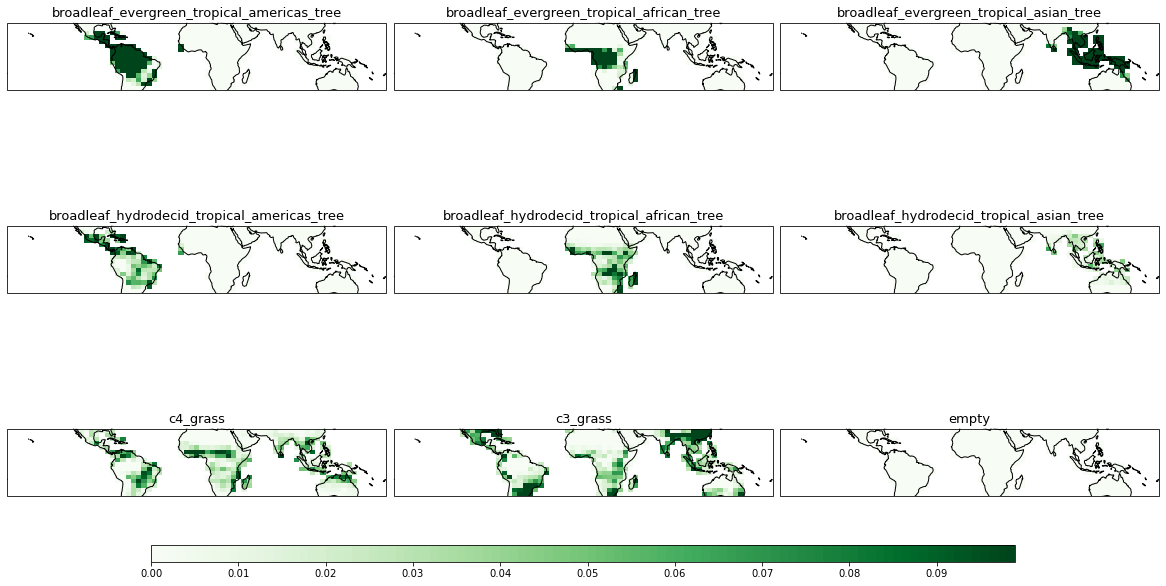

In [5]:
fig, axs = plt.subplots(nrows=3,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,12))
axs = axs.flatten()

clevs=np.arange(0,0.1,0.001)

for i in range(0,9):
    cs = vegc_pf.isel(fates_levpft=i).plot(levels=clevs,cmap='Greens', ax=axs[i],
                                                     add_colorbar=False)
    axs[i].coastlines()
    axs[i].set_title(pftnames[i],fontsize=13)

#fig.delaxes(axs[17])

# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9,
                    wspace=0.02, hspace=0.02)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')   